In [13]:
#data manipulation
import numpy as np
import pandas as pd

#data visualisation
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

plt.rcParams['font.size']=24
plt.style.use('seaborn')

#number of columns displayed
pd.set_option('display.max_columns',10)

In [14]:
crime=pd.read_csv('Crime1.csv')

In [22]:
crime.head(7)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138


In [21]:
print(crime.dtypes,'\n')
print(crime.shape)

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object 

(835, 9)


In [20]:
crime['Dates']=pd.to_datetime(crime.Dates)

In [23]:
#dataframe containing category counts
category = pd.DataFrame(list(zip(crime.Category.value_counts().index,crime.Category.value_counts())), columns=['Category','value'], index=None)

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


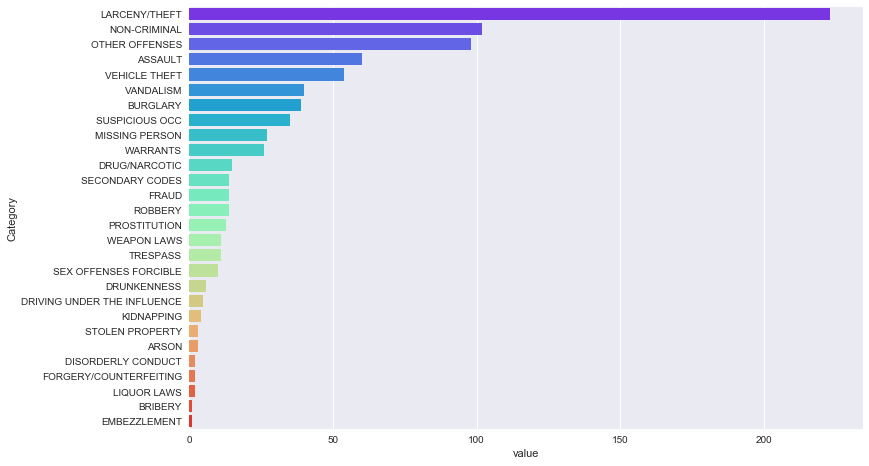

In [44]:
sns.catplot(x='value',y='Category',data=category,kind='bar',palette="rainbow",size=7,aspect=1.8)

In [55]:
#wordcloud to show most popular category by key word
catcloud=WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=1200,
    height=900).generate(" ".join(category['Category'].values))

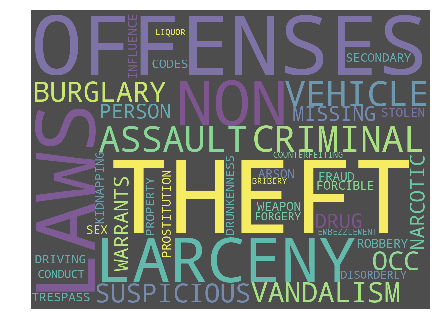

In [56]:
plt.imshow(catcloud,alpha=0.7)
plt.axis('off')
plt.show()

# from above we can see that..
1.larceny/theft is the highest category of crime in the area

2.this is followed closely by non-criminal and other offenses

3.surprisingly corruption cases like embezzlement and bribery are among the lowest sources of crime

4.from the wordcloud

-theft and offenses are pretty high rated, maybe the estates and police should implement some neighborhood watch :-)

In [71]:
#onto the next column which is a description of the offense
description=pd.DataFrame(list(zip(crime.Descript.value_counts().index,crime.Descript.value_counts())),columns=['Description','value'],index=None)
                         

In [84]:
description.head(20)

,Description,value
0,GRAND THEFT FROM LOCKED AUTO,76
1,"AIDED CASE, MENTAL DISTURBED",30
2,PETTY THEFT OF PROPERTY,30
3,STOLEN AUTOMOBILE,30
4,BATTERY,22
5,GRAND THEFT FROM UNLOCKED AUTO,20
6,LOST PROPERTY,20
7,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",19
8,"DRIVERS LICENSE, SUSPENDED OR REVOKED",18
9,PETTY THEFT FROM LOCKED AUTO,16


woooow that's too much clutter ,let's try a wordcloud instead

In [81]:
descloud=WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    width=1200,
    height=900).generate(" ".join(description['Description']))

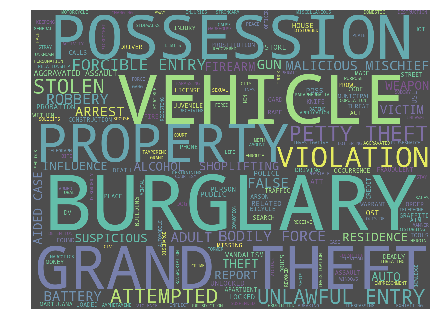

In [83]:
plt.imshow(descloud,alpha=0.7)
plt.axis('off')
plt.show()

we can also look at days which are most synonimous with crime

In [85]:
DOW=pd.DataFrame(list(zip(crime.DayOfWeek.value_counts().index,crime.DayOfWeek.value_counts())),columns=['Day','no of crimes'],index=None)

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


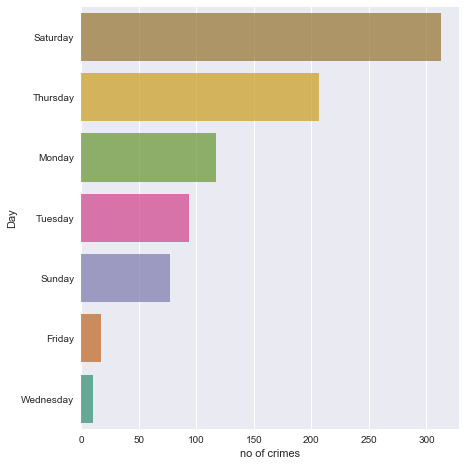

In [93]:
sns.catplot(x='no of crimes',y='Day',data=DOW,alpha=0.7,kind='bar',palette='Dark2_r',size=7)

hmm so thursday and saturday huh, cops better be on the lookout
friday's crime is pretty low,

guess even criminals have to turn up huh

In [94]:
#now let's see how competent the cops are. do they solve most of this crimes or nah?
resolved=pd.DataFrame(list(zip(crime.Resolution.value_counts().index,crime.Resolution.value_counts())),columns=['resolution','values'],index=None)

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


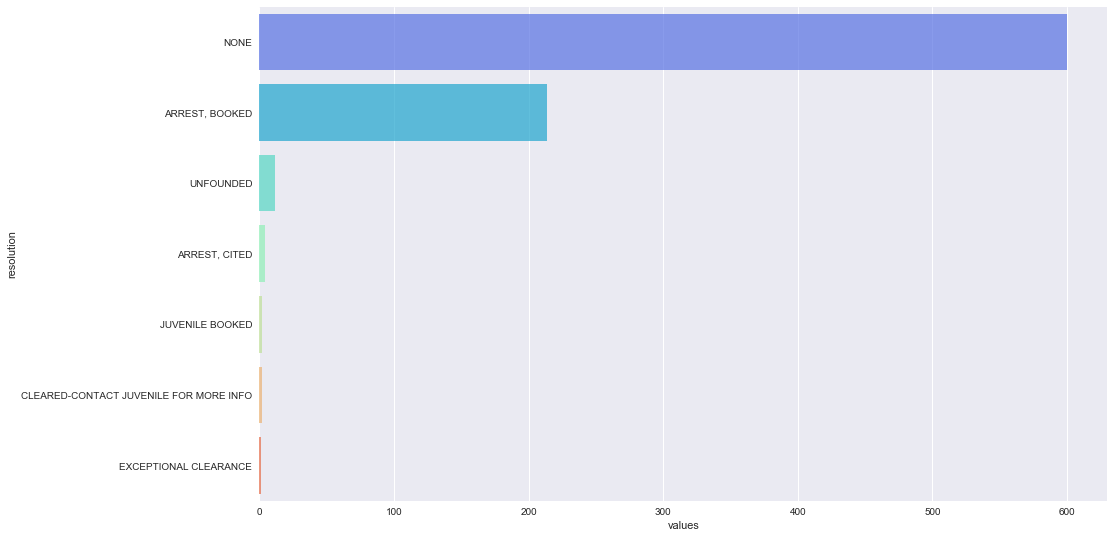

In [105]:
sns.catplot(x='values',y='resolution',data=resolved,kind='bar',alpha=0.7,size=8,aspect=2,palette='rainbow')

oh boy, oh boy ,looks like some bad people are still roaming this streets, better be on the lookout

In [107]:
#let's see which is the unsafest district so as to keep a look for this bad men
district=pd.DataFrame(list(zip(crime.PdDistrict.value_counts().index,crime.PdDistrict.value_counts())),columns=['district','values'],index=None)

C:\Users\LEWIS\Anaconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


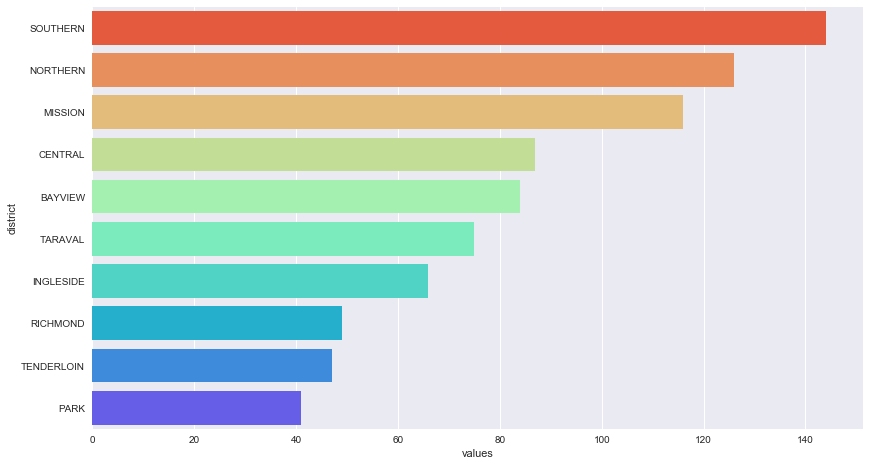

In [111]:
sns.catplot(x='values',y='district',data=district,kind='bar',size=7,aspect=1.8,palette='rainbow_r')

In [120]:
print('max longitude is {}: \n'.format(crime.X.max()))
print('min longitude is {}: \n'.format(crime.X.min()))
print('max latitude is {}: \n'.format(crime.Y.max()))
print('min latitude is {}: \n '.format(crime.Y.min()))

max longitude is -122.36556540000001: 

min longitude is -122.5100325: 

max latitude is 37.809670700000005: 

min latitude is 37.70863484: 
 


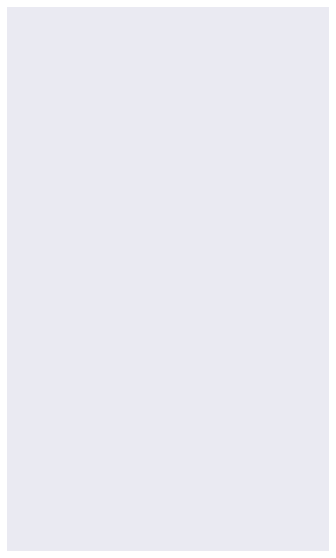

In [124]:
#the x and y are coordinates to where this crimes occured in the towns
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
west, south, east, north = -160.5100325, 60.50, -150.36556540000001, 50.92

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(crime['X'].values, crime['Y'].values)
m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=cm.YlOrRd_r);